# Name: Sriram

From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

Dataset : https://bit.ly/3kXTdox

In [22]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
df = pd.read_csv('d:/sparks/Iris.csv')
df['Species'].loc[101:102]

101    Iris-virginica
102    Iris-virginica
Name: Species, dtype: object

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [25]:
# See how many classes are available totally in dataset

df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [26]:
from sklearn.preprocessing import LabelEncoder

#Encode text classes to numeric classes
encoder = LabelEncoder().fit(df['Species'])

In [27]:
# Get hot encoded numeric classes from text classes

hot_encoded_labels = pd.DataFrame(encoder.transform(df['Species']))

In [28]:
# Assign required features to features dataframe

features = df.drop(['Species','Id'], axis=1)

In [29]:
features.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


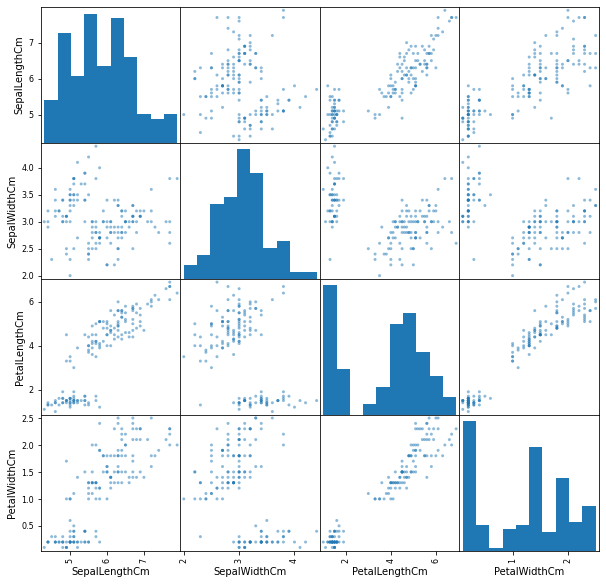

In [30]:
# Draw scatter_matrix to to see relevance of features

pd.plotting.scatter_matrix(features, figsize=(10,10))
x = 1

In [31]:
# Applying unsupervised learning techniques on features

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

In [32]:
# Create two models KMeans and GaussianMixture

clf = KMeans(n_clusters=3).fit(features)
gclf = GaussianMixture(n_components=3).fit(features)

In [33]:
# Predict features i.e.,predict inputs based on formed clusters

preds = clf.predict(features)
gpreds = gclf.predict(features)

In [34]:
def draw_clusters(features, preds):
    fig, axis = plt.subplots(2,2,figsize=(10,8))
    fea_matrix=  [('SepalLengthCm','SepalWidthCm'), ('PetalLengthCm', 'PetalWidthCm'),\
                 ('SepalLengthCm','PetalWidthCm'), ('PetalLengthCm','SepalWidthCm')]

    for i,row in enumerate(axis):
        for j,col in enumerate(row):
            x,y = fea_matrix[i+j]
            col.set_xlabel(x)
            col.set_ylabel(y)
            col.scatter(features[x],features[y], alpha=0.5,  c=preds,cmap='viridis',s=20 )
    plt.show()

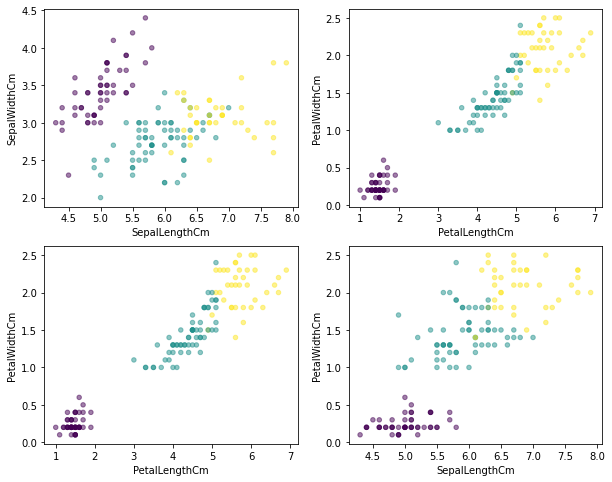

In [35]:
#Clusters formed based on KMeans model

draw_clusters(features, preds)

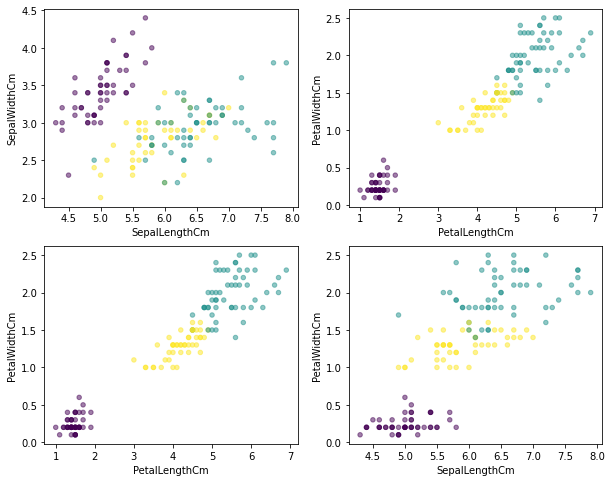

In [36]:
#Clusters formed based on GaussianMixture Model

draw_clusters(features, gpreds)

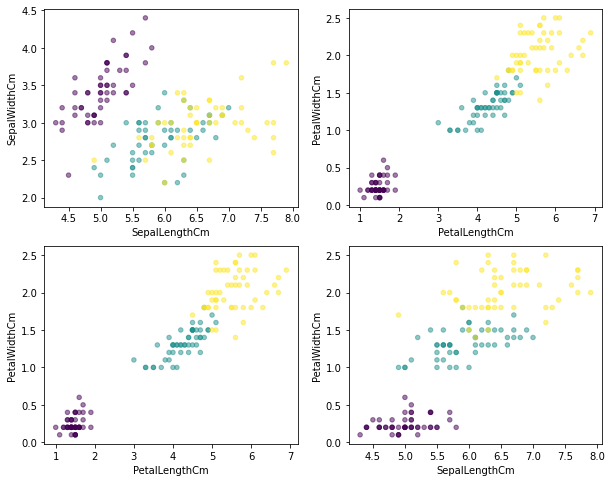

In [37]:
#Clusters of actual output labels.

draw_clusters(features, list(hot_encoded_labels[0]))